Домашнее задание к лекции «Корреляция и корреляционный анализ»

Возьмем датасет Mortality and Water Hardness**
www.kaggle.com...r-hardness



Попробуем ответить на вопрос? есть ли связь между жёсткостью воды и средней годовой смертностью?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


Text(0, 0.5, 'hardness')

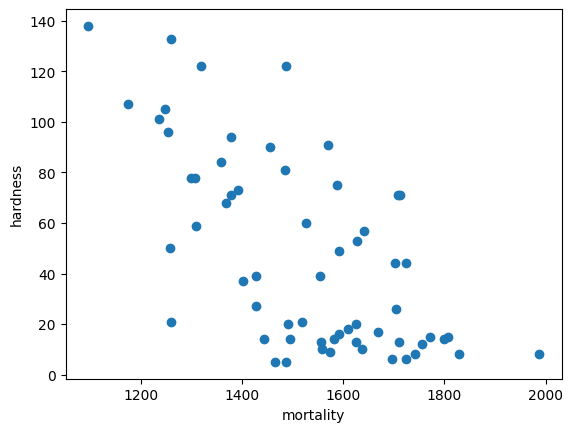

In [ ]:
plt.scatter(df.mortality, df.hardness)
plt.xlabel('mortality')
plt.ylabel('hardness')

In [ ]:
#corr Pirson Связь отрицательная не очень сильная
df[['hardness','mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [ ]:
#corr Spirman Связь отрицательная не очень сильная
df[['hardness','mortality']].corr(method = 'spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['hardness']]
y = df['mortality']

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.25) #random state - это случайное состояние тестовой и обучающей выборки число - номер фиксации

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr.coef_

array([-3.09380276])

In [ ]:
lr.intercept_

1655.9842729503503

y = kx+ b or y = lr.coef_*x + lr.intercept_

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
# коэффициент детерминации определяет качество модели. Если модель хорошая то больше 0. Чем ближе к 1 тем лучше модель. Он хороший
import sklearn.metrics as metrics
print (f'R2:{metrics.r2_score(y_test,y_pred)}')

R2:0.5191783366104643


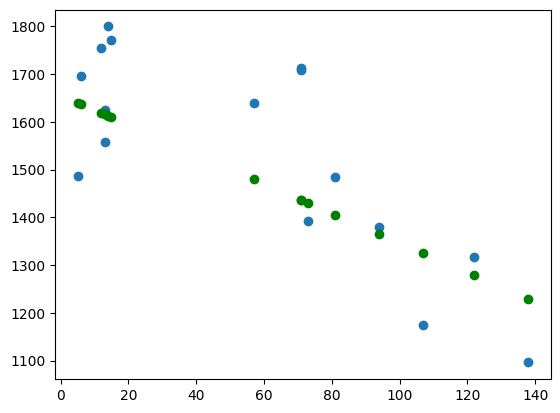

In [ ]:
plt.scatter(X_test,y_test)
plt.scatter(X_test,y_pred, c='g')

<Axes: xlabel='mortality', ylabel='Count'>

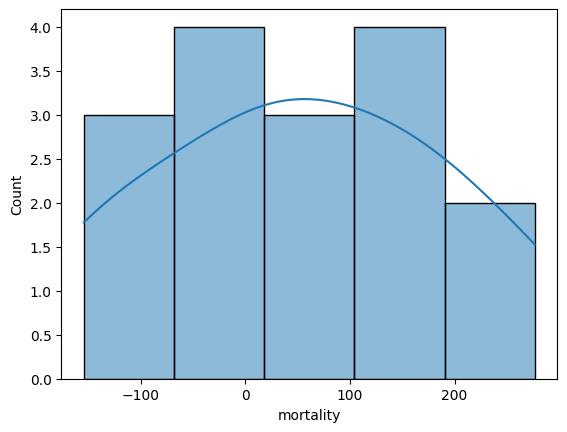

In [ ]:
import seaborn as sns
sns.histplot((y_test - y_pred), kde = True)

# Остатки (ошибки модели) Они хаотичны. Системы не видно. Значт они выбраны верно

Попробуем ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

In [ ]:

dfs= df[df['location'] == 'South']
dfn = df[df['location'] == 'North']


Text(0, 0.5, 'hardness')

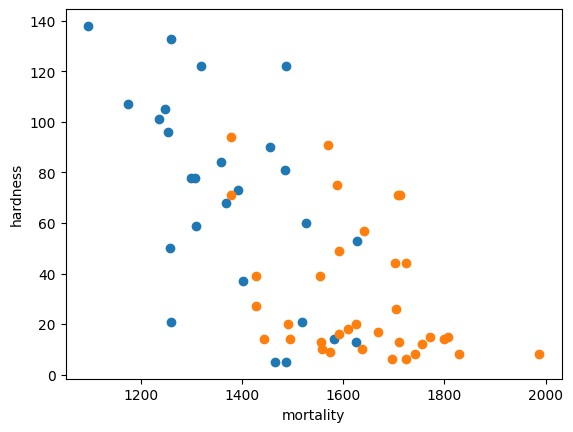

In [ ]:
plt.scatter(dfs.mortality, dfs.hardness)
plt.scatter(dfn.mortality, dfn.hardness)
plt.xlabel('mortality')
plt.ylabel('hardness')

In [ ]:
dfs[['hardness','mortality']].corr() #Для юга коэффициент корреляции сохраняется

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [ ]:
dfn[['hardness','mortality']].corr() #Для севера коэффициент корреляции слабый

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [ ]:
dfs[['hardness','mortality']].corr(method = 'spearman') #Для юга коэффициент корреляции сохраняется

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [ ]:
dfn[['hardness','mortality']].corr(method = 'spearman')  #Для севера коэффициент корреляции слабый

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [ ]:
Xn = dfn[['hardness']]
yn = dfn['mortality']
Xn_train, Xn_test, yn_train, yn_test =train_test_split(Xn,yn, test_size=0.25)
lrn = LinearRegression()
lrn.fit(Xn_train,yn_train)

LinearRegression()

In [ ]:
lrn.coef_


array([-1.09242291])

In [ ]:
lrn.intercept_

1653.926821644613

In [ ]:
Xs = dfs[['hardness']]
ys = dfs['mortality']
Xs_train, Xs_test, ys_train, ys_test =train_test_split(Xs,ys, test_size=0.25)
lrs = LinearRegression()
lrs.fit(Xs_train,ys_train)

LinearRegression()

In [ ]:
lrs.coef_

array([-1.66539914])

In [ ]:
lrs.intercept_

1497.3730174239245

Коэффициенты k (coef_) у обоих выборок приблизительно равны. Значит наклон кривой будет одинаков. Только lrn будет выше



In [ ]:
ys_pred = lr.predict(Xs_test)
yn_pred = lr.predict(Xn_test)

In [ ]:
# коэффициентs детерминации малы. Значит модели можно слабо доверять.
print (f'R2:{metrics.r2_score(ys_test,ys_pred)}') # юг. Коэффициент равен 0.
# и это значит что модель предсказывает досаточно верно.  Подтверждается коэффициентом корреляции.
print (f'R2:{metrics.r2_score(yn_test,yn_pred)}') # север. Коэффициент равен 0.02. Это значит что модель предсказывает слабо. Что подтверждается малым коэффицентом корреляции.

R2:0.5048587457791492
R2:0.02899531864037852


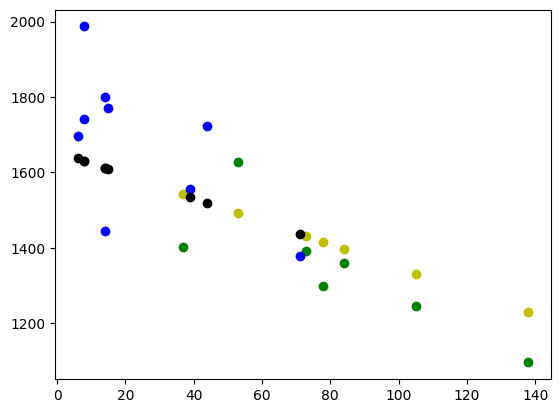

In [ ]:
plt.scatter(Xs_test,ys_test, c='g')
plt.scatter(Xs_test,ys_pred, c='y')
plt.scatter(Xn_test,yn_test, c='b')
plt.scatter(Xn_test,yn_pred, c='k')
# По графикам видно,  что модель предсказывает не точно.

<Axes: xlabel='mortality', ylabel='Count'>

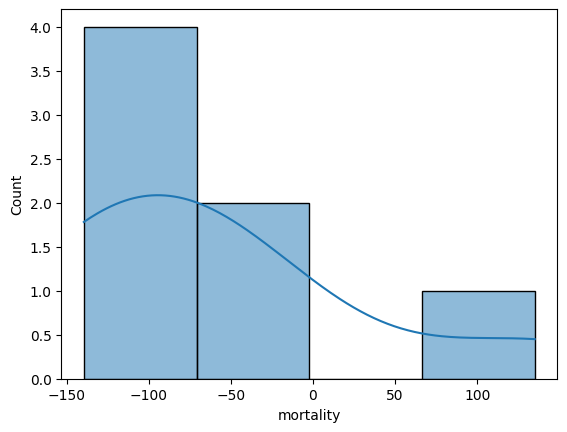

In [ ]:
sns.histplot((ys_test - ys_pred), kde = True) #случайные значения

<Axes: xlabel='mortality', ylabel='Count'>

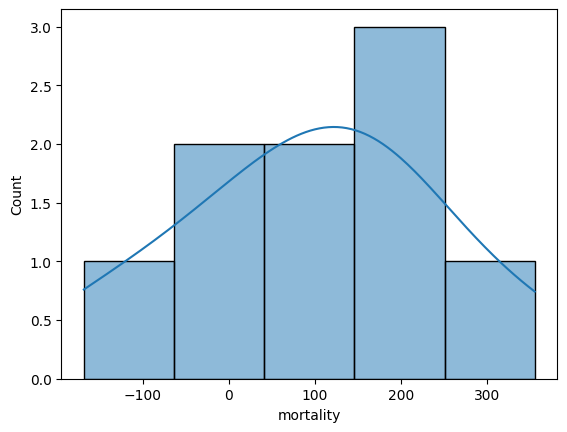

In [ ]:
sns.histplot((yn_test - yn_pred), kde = True) # что -то похожее на паараболу есть, но если еще раз переобучить модель, зависимости не будет видно.